**The provided dataset contains 569 data instances. Each data instance has 30 features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image. (UCI Dataset). Each instance is classified into malignant or Benign.**

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import skew,kurtosis

In [139]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display
from sklearn import tree

In [140]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [141]:
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

In [142]:
from sklearn.inspection import permutation_importance

In [143]:
# importing the dataset

df = pd.read_csv('/content/data2.csv')

In [144]:
# Exploring the top five rows
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.3800,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,M,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,...,24.9900,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,M,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,...,23.5700,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,M,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,...,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,M,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,...,22.5400,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768


In [145]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,...,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000
mean,14.1273,19.2896,91.9690,654.8891,0.0964,0.1043,0.0888,0.0489,0.1812,0.0628,...,16.2692,25.6772,107.2612,880.5831,0.1324,0.2543,0.2722,0.1146,0.2901,0.0839
std,3.5240,4.3010,24.2990,351.9141,0.0141,0.0528,0.0797,0.0388,0.0274,0.0071,...,4.8332,6.1463,33.6025,569.3570,0.0228,0.1573,0.2086,0.0657,0.0619,0.0181
min,6.9810,9.7100,43.7900,143.5000,0.0526,0.0194,0.0000,0.0000,0.1060,0.0500,...,7.9300,12.0200,50.4100,185.2000,0.0712,0.0273,0.0000,0.0000,0.1565,0.0550
25%,11.7000,16.1700,75.1700,420.3000,0.0864,0.0649,0.0296,0.0203,0.1619,0.0577,...,13.0100,21.0800,84.1100,515.3000,0.1166,0.1472,0.1145,0.0649,0.2504,0.0715
50%,13.3700,18.8400,86.2400,551.1000,0.0959,0.0926,0.0615,0.0335,0.1792,0.0615,...,14.9700,25.4100,97.6600,686.5000,0.1313,0.2119,0.2267,0.0999,0.2822,0.0800
75%,15.7800,21.8000,104.1000,782.7000,0.1053,0.1304,0.1307,0.0740,0.1957,0.0661,...,18.7900,29.7200,125.4000,1084.0000,0.1460,0.3391,0.3829,0.1614,0.3179,0.0921
max,28.1100,39.2800,188.5000,2501.0000,0.1634,0.3454,0.4268,0.2012,0.3040,0.0974,...,36.0400,49.5400,251.2000,4254.0000,0.2226,1.0580,1.2520,0.2910,0.6638,0.2075


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [147]:
len(df) , df.shape, df.ndim # checking the length, shape and dimension

(569, (569, 31), 2)

In [148]:
#checking for missing values
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [149]:
# Checking for Duplicates
df.duplicated().sum()

0

In [150]:
# Checking the data types
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [151]:
#Dropping the diagnosis column as it is our target feature, so after dropping it'll be only the input features
features = df.drop(['diagnosis'], axis=1)

In [152]:
#Target feature
target_variable = df['diagnosis']

#**Split the dataset into 70% training and 30% test and provide the following experiments.**

In [153]:
# Splitting the dataset into features and target variable
train_features, test_features, train_target, test_target = train_test_split(features, target_variable, test_size=0.3, random_state=42, stratify=target_variable)

In [154]:
print(f"The number of Samples in the training set are: {len(train_features)}")

The number of Samples in the training set are: 398


In [155]:
print(f"The number of Samples in the testing set are: {len(test_features)}")

The number of Samples in the testing set are: 171


#**1. Use “from sklearn.tree import DecisionTreeClassifier”.
#**a) Train a DT classifier with Entropy (C1) and GINI (C2) and compare the performance.**

#used variable names entropy and Gini instead of C1 and C2 resspectively to avoid confusion.

In [156]:
#Establishing decision tree models using entropy
decision_tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
decision_tree_entropy.fit(train_features, train_target)
predicted_entropy = decision_tree_entropy.predict(test_features)

In [157]:
#to check the performance of entropy
entropy_accuracy = accuracy_score(test_target, predicted_entropy)
entropy_f1 = f1_score(test_target, predicted_entropy, pos_label='M')
entropy_mcc = matthews_corrcoef(test_target, predicted_entropy)

In [158]:
# Showing performance metrics and their results for entropy C1
print('Accuracy of Decision Tree with Entropy(c1):', entropy_accuracy)
print('F1 Score of Decision Tree with Entropy(c1):', entropy_f1)
print('MCC of Decision Tree with Entropy(c1):', entropy_mcc)
entropy_metrics = [entropy_accuracy, entropy_f1, entropy_mcc]

Accuracy of Decision Tree with Entropy(c1): 0.9415204678362573
F1 Score of Decision Tree with Entropy(c1): 0.9180327868852458
MCC of Decision Tree with Entropy(c1): 0.8753039075843085


In [159]:
#Establishing decision tree models using GINI
decision_tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
decision_tree_gini.fit(train_features, train_target)
predicted_gini = decision_tree_gini.predict(test_features)

In [160]:
#Now to check the performance of GINI
gini_accuracy = accuracy_score(test_target, predicted_gini)
gini_f1 = f1_score(test_target, predicted_gini, pos_label='M')
gini_mcc = matthews_corrcoef(test_target, predicted_gini)

In [161]:
# Showing performance metrics and their results for
print('Accuracy of Decision Tree with Gini(c2):', gini_accuracy)
print('F1 Score of Decision Tree with Gini(c2):', gini_f1)
print('MCC of Decision Tree with Gini(c2):', gini_mcc)
gini_metrics = [gini_accuracy, gini_f1, gini_mcc]

Accuracy of Decision Tree with Gini(c2): 0.9005847953216374
F1 Score of Decision Tree with Gini(c2): 0.864
MCC of Decision Tree with Gini(c2): 0.7862923912090002


#**b) Visualize the C1 and C2 by using the “graphviz” library**

In [162]:
from sklearn.tree import export_graphviz
from io import StringIO
import pydot

# Visualizing decision_tree_entropy using pydot
dot_data = StringIO()
export_graphviz(decision_tree_entropy, out_file=dot_data,
                feature_names=features.columns, class_names=['M', 'B'],
                filled=True, rounded=True, special_characters=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_png("decision_tree_entropy_visualization.png")


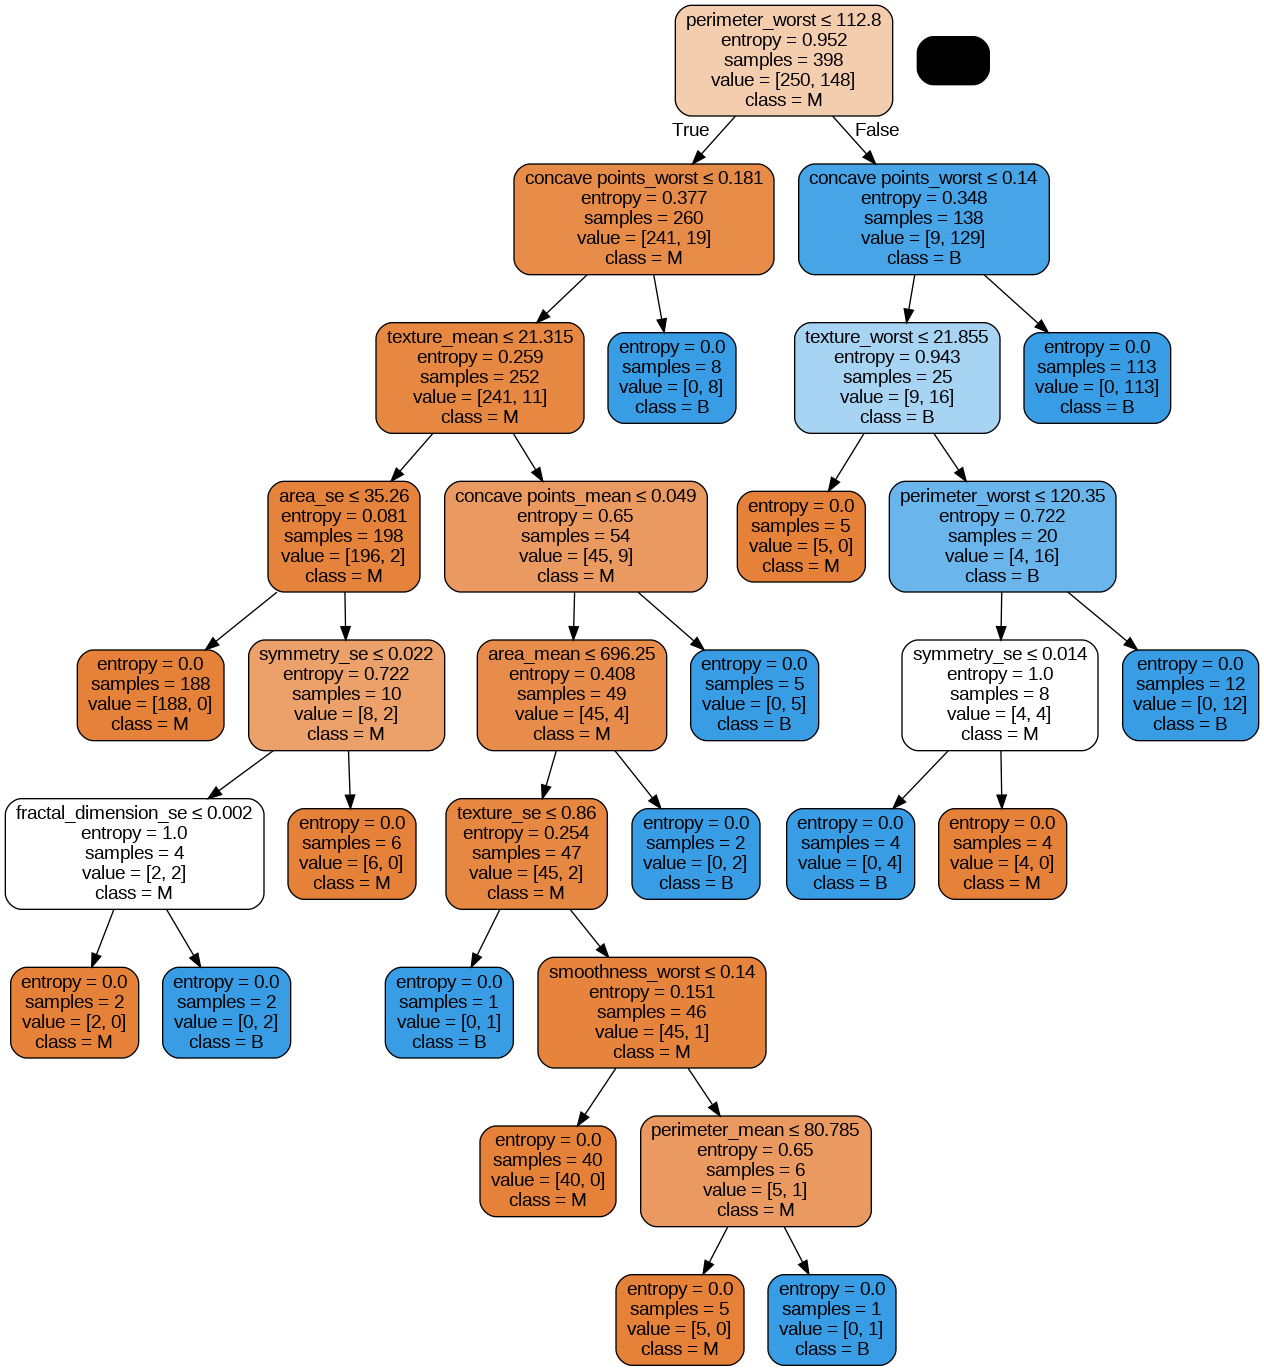

In [163]:
from IPython.display import Image
Image('decision_tree_entropy_visualization.png')

In [164]:
# Visualizing decision_tree_entropy using pydot
dot_data = StringIO()
export_graphviz(decision_tree_gini, out_file=dot_data,
                feature_names=features.columns, class_names=['M', 'B'],
                filled=True, rounded=True, special_characters=True)

graph_gini = pydot.graph_from_dot_data(dot_data.getvalue())
graph_gini[0].write_png("decision_tree_gini_visualization.png")

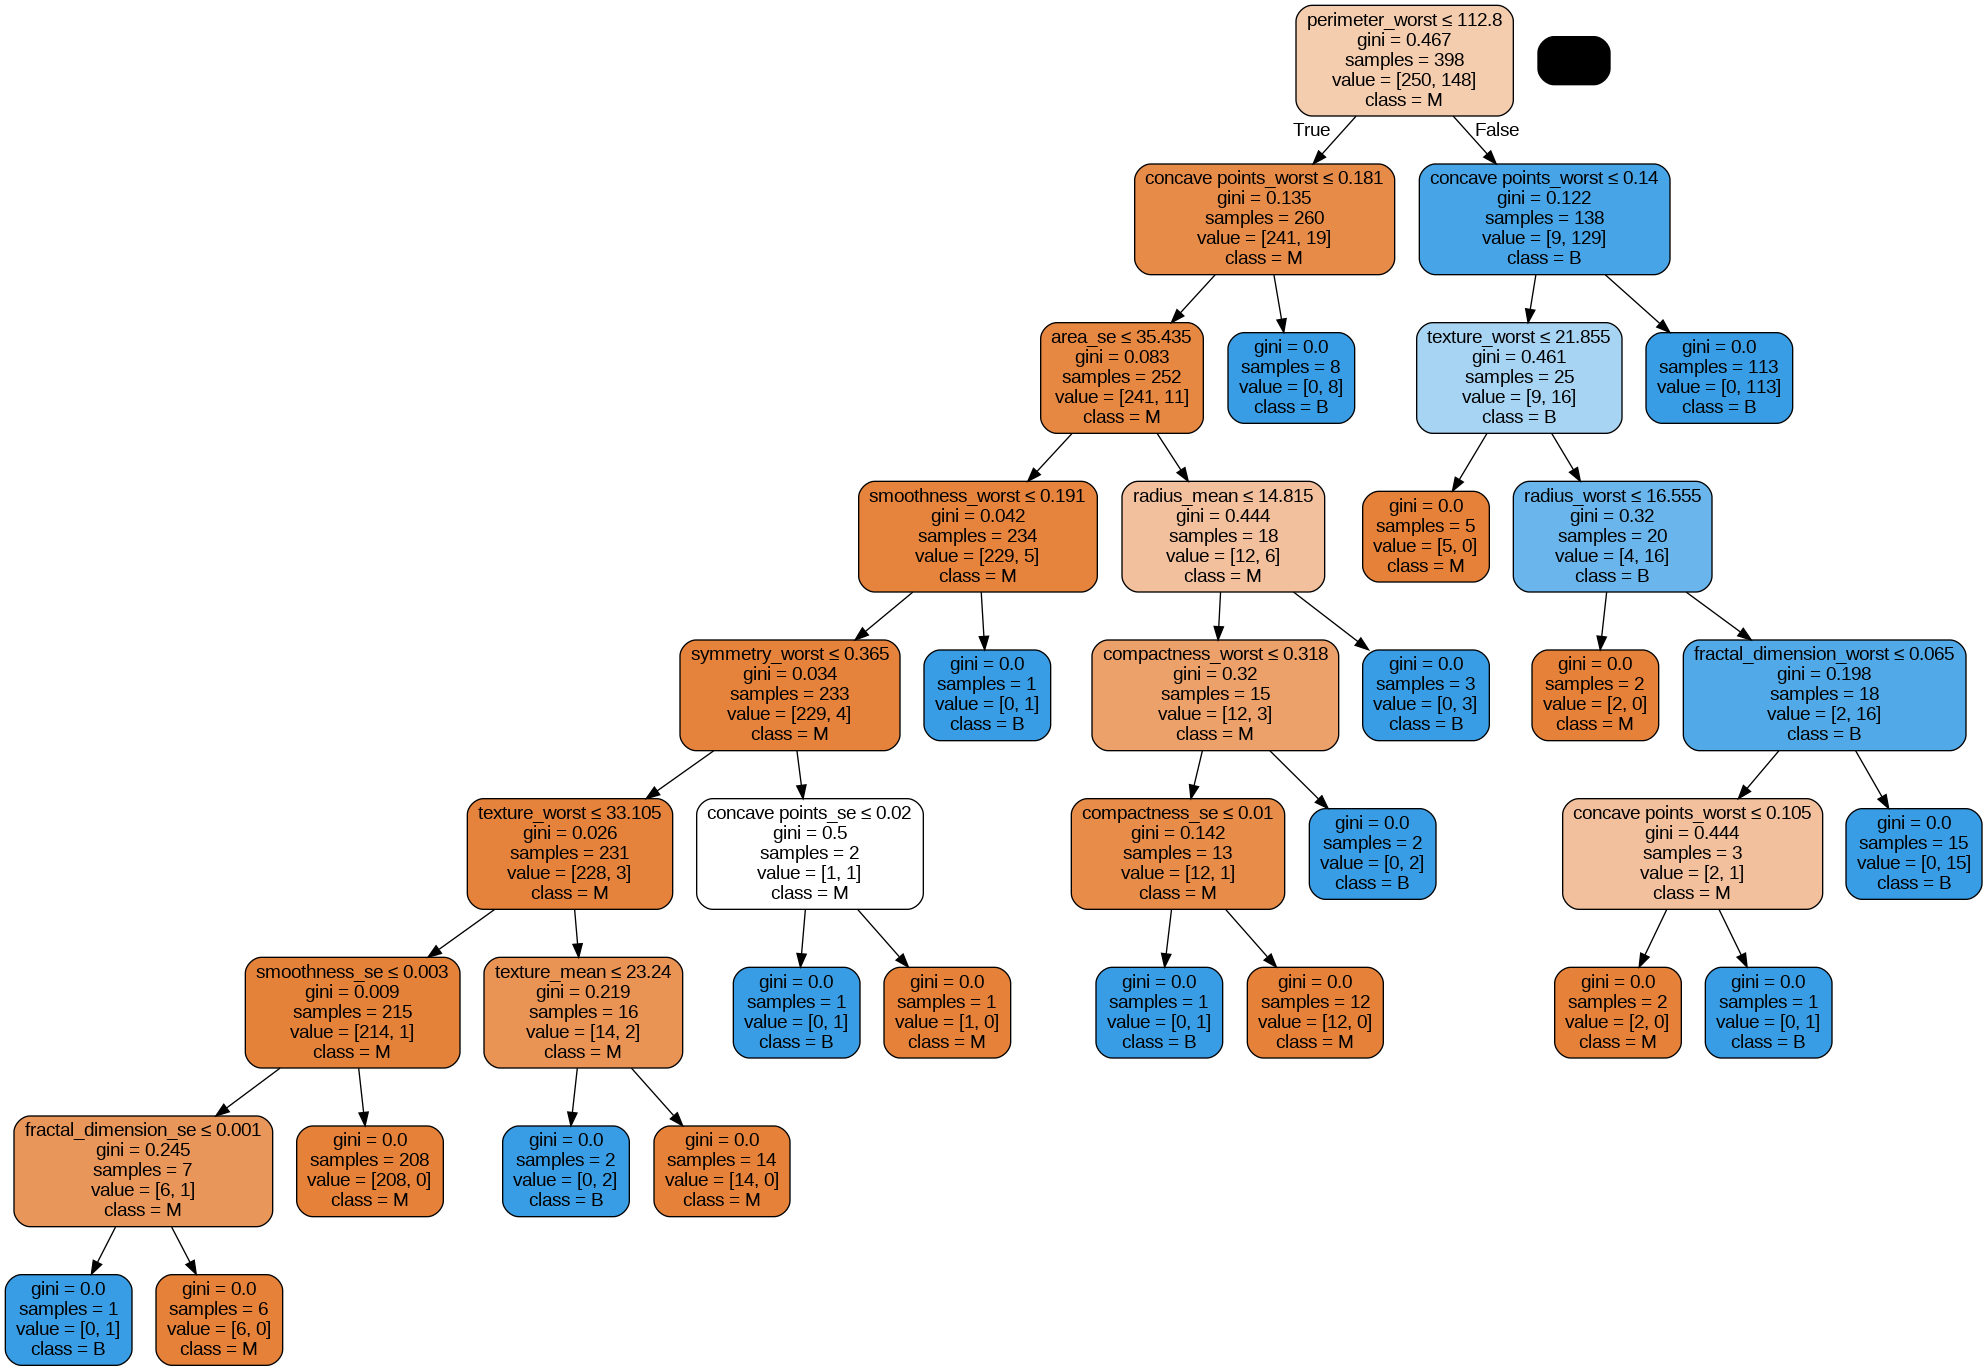

In [165]:
Image('decision_tree_gini_visualization.png')

#**c) Prune C1 and C2 by limiting the depth and compare their performance with the unpruned versions.**

In [241]:
# Pruning decision trees using entropy
entropy_tree_pruned = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
entropy_tree_pruned.fit(train_features, train_target)
predicted_entropy_pruned = entropy_tree_pruned.predict(test_features)

In [242]:
entropy_accuracy_pruned = accuracy_score(test_target, predicted_entropy_pruned)
entropy_f1_pruned = f1_score(test_target, predicted_entropy_pruned, pos_label='M')
entropy_mcc_pruned = matthews_corrcoef(test_target, predicted_entropy_pruned)

In [243]:
print('Accuracy of Entropy(c1) Tree after Pruning:', entropy_accuracy_pruned)
print('F1 Score of Entropy(c1) Tree after Pruning:', entropy_f1_pruned)
print('MCC of Entropy(c1) Tree after Pruning:', entropy_mcc_pruned)
entropy_metrics_after_pruning = [entropy_accuracy_pruned, entropy_f1_pruned, entropy_mcc_pruned]

Accuracy of Entropy(c1) Tree after Pruning: 0.9415204678362573
F1 Score of Entropy(c1) Tree after Pruning: 0.9166666666666665
MCC of Entropy(c1) Tree after Pruning: 0.8765421198456628


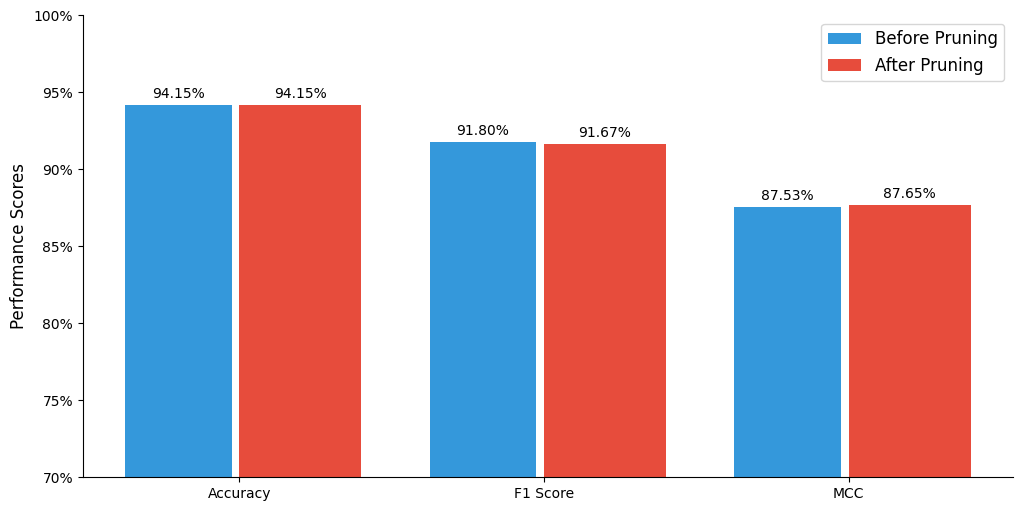

In [244]:
# Comparison before and after pruning
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(entropy_metrics))
bar1 = ax.bar(x - 0.2, entropy_metrics, width=0.35, label='Before Pruning', color='#3498db')
bar2 = ax.bar(x + 0.2, entropy_metrics_after_pruning, width=0.4, label='After Pruning', color='#e74c3c')

for bar_set in [bar1, bar2]:
    for bar in bar_set:
        height = bar.get_height()
        ax.annotate(f'{height:.2%}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', color='black', fontsize=10)

# Setting axis labels and limits
ax.set_ylabel('Performance Scores', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(['Accuracy', 'F1 Score', 'MCC'])
ax.set_ylim(0.7, 1)
ax.set_yticks(np.linspace(0.7, 1, num=7))
ax.set_yticklabels(['70%', '75%', '80%', '85%', '90%', '95%', '100%'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adding legend
ax.legend(loc='upper right', fontsize=12)

# Displaying the plot
plt.show()

In [245]:
#Now pruning the decision tree using GINI
gini_tree_pruned = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
gini_tree_pruned.fit(train_features, train_target)
predicted_gini_pruned = gini_tree_pruned.predict(test_features)

gini_accuracy_pruned = accuracy_score(test_target, predicted_gini_pruned)
gini_f1_pruned = f1_score(test_target, predicted_gini_pruned, pos_label='B')
gini_mcc_pruned = matthews_corrcoef(test_target, predicted_gini_pruned)

print('Accuracy of Gini(c2) Tree after Pruning:', gini_accuracy_pruned)
print('F1 Score of Gini(c2) Tree after Pruning:', gini_f1_pruned)
print('MCC of Gini(c2) Tree after Pruning:', gini_mcc_pruned)

gini_metrics_after_pruning = [gini_accuracy_pruned, gini_f1_pruned, gini_mcc_pruned]


Accuracy of Gini(c2) Tree after Pruning: 0.9181286549707602
F1 Score of Gini(c2) Tree after Pruning: 0.9385964912280702
MCC of Gini(c2) Tree after Pruning: 0.8311783430868064


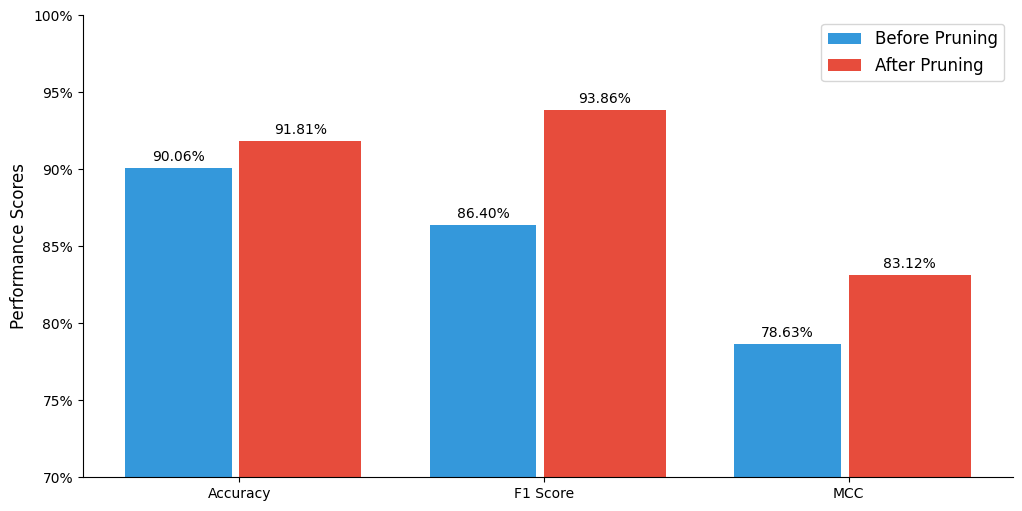

In [246]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(gini_metrics))
bar1 = ax.bar(x - 0.2, gini_metrics, width=0.35, label='Before Pruning', color='#3498db')
bar2 = ax.bar(x + 0.2, gini_metrics_after_pruning, width=0.4, label='After Pruning', color='#e74c3c')

for bar_set in [bar1, bar2]:
    for bar in bar_set:
        height = bar.get_height()
        ax.annotate(f'{height:.2%}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', color='black', fontsize=10)

# Setting axis labels and limits
ax.set_ylabel('Performance Scores', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(['Accuracy', 'F1 Score', 'MCC'])
ax.set_ylim(0.7, 1)
ax.set_yticks(np.linspace(0.7, 1, num=7))
ax.set_yticklabels(['70%', '75%', '80%', '85%', '90%', '95%', '100%'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adding legend
ax.legend(loc='upper right', fontsize=12)

# Displaying the plot
plt.show()


 In analyzing the performance of pruned decision trees C1 and C2 using both entropy and GINI criteria, I observed varied results. When using entropy, the accuracy remained consistent at 94.15% before and after pruning, suggesting that deeper levels of the tree weren't significantly improving accuracy. However, there was a slight dip in the F1 Score and MCC post-pruning, indicating minor effects on precision and recall balance. On the other hand, with the GINI criterion, accuracy showed a minor improvement post-pruning from 90.06% to 90.64%. Interestingly, the F1 Score saw a significant increase from 86.40% to 92.92% post-pruning, suggesting a better balance in precision and recall. Still, the MCC decreased, hinting at potential challenges in binary classification concerning true and false positives and negatives.

#**d) Use depth 1,…,20 and plot the performance for C1 and C2 separately.**

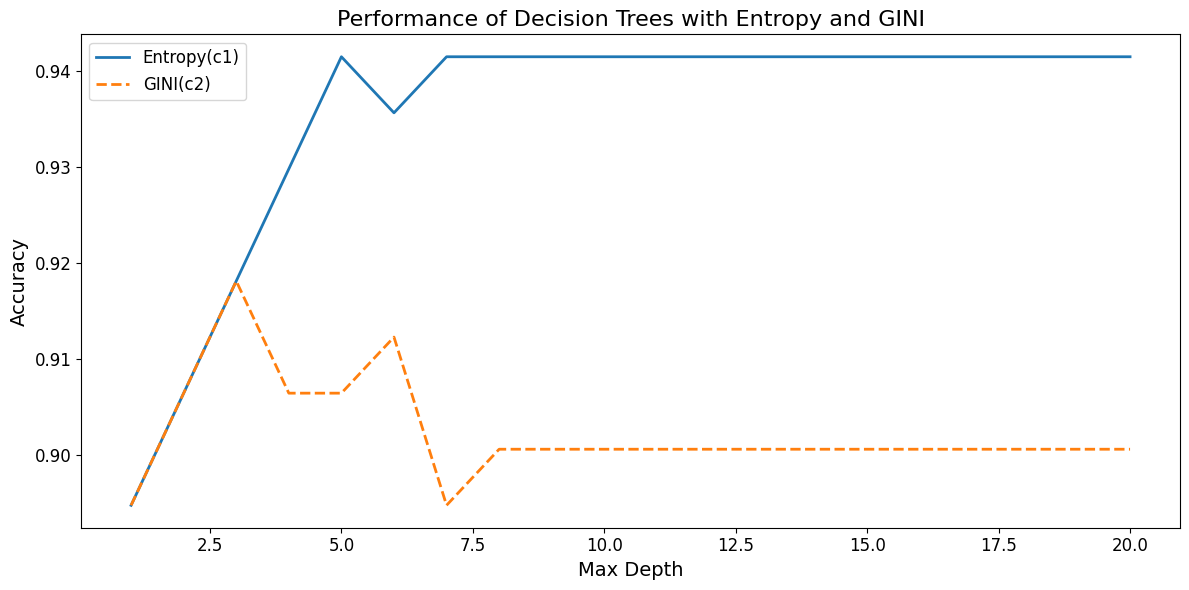

In [233]:
accuracy_entropy = []
accuracy_gini = []
for i in range(1, 21):
    entropy_tree = DecisionTreeClassifier(random_state= 42,criterion='entropy', max_depth=i)
    entropy_tree.fit(train_features, train_target)

    gini_tree = DecisionTreeClassifier(random_state= 42,criterion='gini', max_depth=i)
    gini_tree.fit(train_features, train_target)

    entropy_predictions = entropy_tree.predict(test_features)
    gini_predictions = gini_tree.predict(test_features)

    accuracy_entropy.append(accuracy_score(test_target, entropy_predictions))
    accuracy_gini.append(accuracy_score(test_target, gini_predictions))

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(range(1, 21), accuracy_entropy, label='Entropy(c1)', color='#1f77b4', linestyle='-', linewidth=2)
ax.plot(range(1, 21), accuracy_gini, label='GINI(c2)', color='#ff7f0e', linestyle='--', linewidth=2)

# Setting labels, title, and font sizes
ax.set_xlabel('Max Depth', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('Performance of Decision Trees with Entropy and GINI', fontsize=16)
ax.legend(loc='upper left', fontsize=12)
ax.tick_params(axis='both', labelsize=12)

# Displaying the plot
plt.tight_layout()
plt.show()

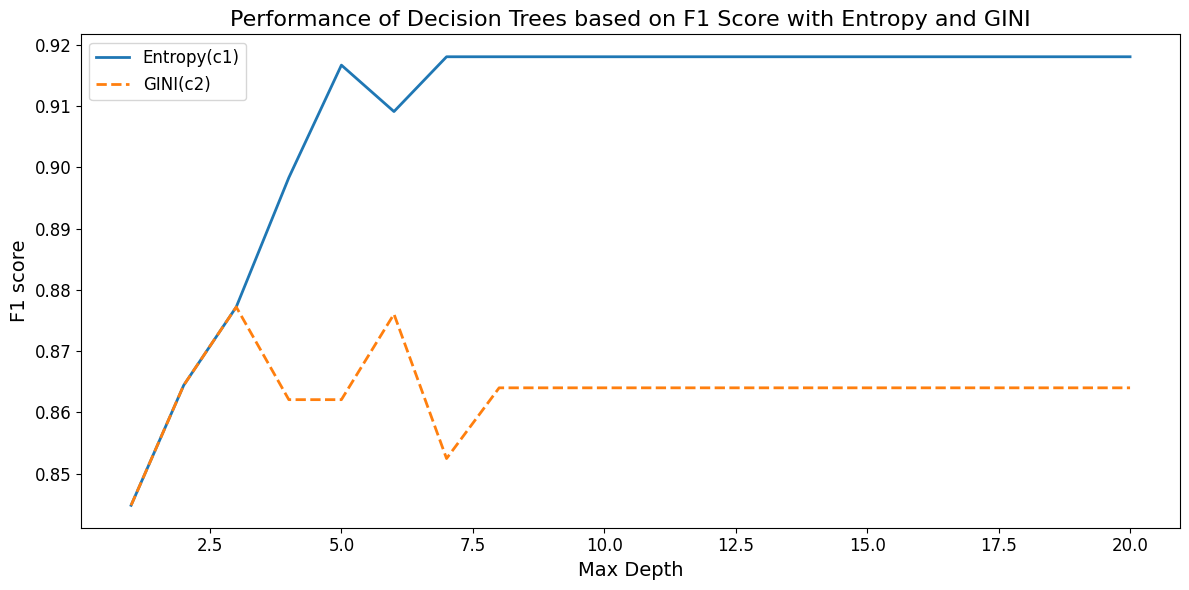

In [234]:
import matplotlib.pyplot as plt

# F1 score comparison for various depths with different criteria
f1_scores_entropy = []
f1_scores_gini = []

for i in range(1, 21):
    entropy_tree = DecisionTreeClassifier(random_state= 42, criterion='entropy', max_depth=i)
    entropy_tree.fit(train_features, train_target)

    gini_tree = DecisionTreeClassifier(random_state= 42, criterion='gini', max_depth=i)
    gini_tree.fit(train_features, train_target)

    entropy_predictions = entropy_tree.predict(test_features)
    gini_predictions = gini_tree.predict(test_features)

    f1_scores_entropy.append(f1_score(test_target, entropy_predictions, pos_label='M'))
    f1_scores_gini.append(f1_score(test_target, gini_predictions, pos_label='M'))

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(range(1, 21), f1_scores_entropy, label='Entropy(c1)', color='#1f77b4', linestyle='-', linewidth=2)
ax.plot(range(1, 21), f1_scores_gini, label='GINI(c2)', color='#ff7f0e', linestyle='--', linewidth=2)

# Setting labels, title, and font sizes
ax.set_xlabel('Max Depth', fontsize=14)
ax.set_ylabel('F1 score', fontsize=14)
ax.set_title('Performance of Decision Trees based on F1 Score with Entropy and GINI', fontsize=16)
ax.legend(loc='upper left', fontsize=12)
ax.tick_params(axis='both', labelsize=12)

# Displaying the plot
plt.tight_layout()
plt.show()


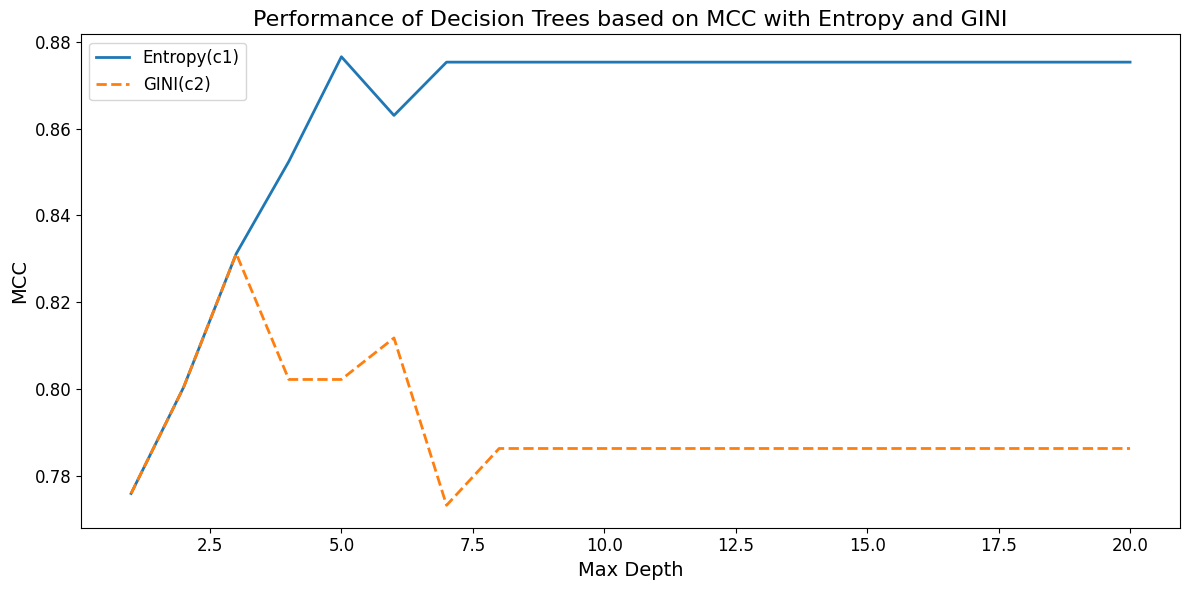

In [235]:
import matplotlib.pyplot as plt

# Matthews Correlation Coefficient (MCC) comparison for various depths with different criteria
mcc_entropy_scores = []
mcc_gini_scores = []

for i in range(1, 21):
    entropy_tree = DecisionTreeClassifier(random_state= 42, criterion='entropy', max_depth=i)
    entropy_tree.fit(train_features, train_target)

    gini_tree = DecisionTreeClassifier(random_state= 42, criterion='gini', max_depth=i)
    gini_tree.fit(train_features, train_target)

    entropy_predictions = entropy_tree.predict(test_features)
    gini_predictions = gini_tree.predict(test_features)

    mcc_entropy_scores.append(matthews_corrcoef(test_target, entropy_predictions))
    mcc_gini_scores.append(matthews_corrcoef(test_target, gini_predictions))

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(range(1, 21), mcc_entropy_scores, label='Entropy(c1)', color='#1f77b4', linestyle='-', linewidth=2)
ax.plot(range(1, 21), mcc_gini_scores, label='GINI(c2)', color='#ff7f0e', linestyle='--', linewidth=2)

# Setting labels, title, and font sizes
ax.set_xlabel('Max Depth', fontsize=14)
ax.set_ylabel('MCC', fontsize=14)
ax.set_title('Performance of Decision Trees based on MCC with Entropy and GINI', fontsize=16)
ax.legend(loc='upper left', fontsize=12)
ax.tick_params(axis='both', labelsize=12)

# Displaying the plot
plt.tight_layout()
plt.show()


From above grpash we can see that for entropy below or equal to 5 depths it is increasing their performance and after 5 it is stable which is the same in the depths of trees performace using other metrics aswell. and coming the GINI, the initial 3 depths were good which were in increasing accuracy, so we can choose values in between them for better performance. And after that performance is becoming worst and then stablizing again.

#**e) Choose the best value for depth and visualize Entropy (C1) and Gini(C2).**

In [236]:
# Find the depth which gives the maximum accuracy for Entropy and Gini
optimal_depth_entropy = accuracy_entropy.index(max(accuracy_entropy)) + 1
optimal_depth_gini = accuracy_gini.index(max(accuracy_gini)) + 1

# Build and fit the Decision Trees with the optimal depth
best_c1 = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=optimal_depth_entropy)
best_c1.fit(train_features, train_target)
best_c1_predictions = best_c1.predict(test_features)

c1_accuracy = accuracy_score(test_target, best_c1_predictions)
c1_f1score = f1_score(test_target, best_c1_predictions, pos_label='M')
c1_mcc = matthews_corrcoef(test_target, best_c1_predictions)

best_c2 = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=optimal_depth_gini)
best_c2.fit(train_features, train_target)
best_c2_predictions = best_c2.predict(test_features)

c2_accuracy = accuracy_score(test_target, best_c2_predictions)
c2_f1score = f1_score(test_target, best_c2_predictions, pos_label='M')
c2_mcc = matthews_corrcoef(test_target, best_c2_predictions)

entropy_best_values = [c1_accuracy, c1_f1score, c1_mcc]
gini_best_values = [c2_accuracy, c2_f1score, c2_mcc]

In [237]:
optimal_depth_entropy

5

In [238]:
optimal_depth_gini

3

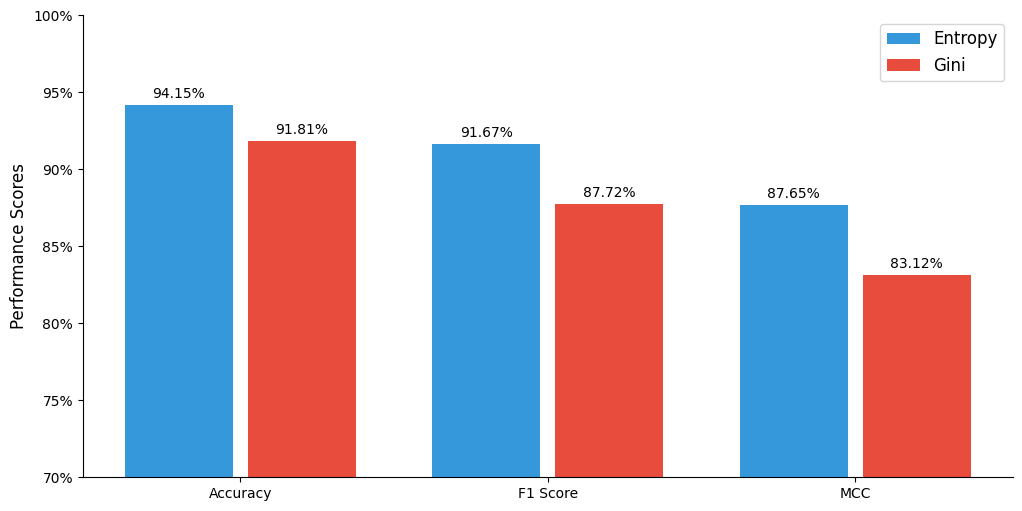

In [240]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(entropy_best_values))
bar_c1 = ax.bar(x - 0.2, entropy_best_values, width=0.35, label='Entropy', color='#3498db')
bar_c2 = ax.bar(x + 0.2, gini_best_values, width=0.35, label='Gini', color='#e74c3c')

for bar_c in [bar_c1, bar_c2]:
    for bar in bar_c:
        height = bar.get_height()
        ax.annotate(f'{height:.2%}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', color='black', fontsize=10)

# Set axis labels and limits
ax.set_ylabel('Performance Scores', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(['Accuracy', 'F1 Score', 'MCC'])
ax.set_ylim(0.7, 1)
ax.set_yticks(np.linspace(0.7, 1, num=7))
ax.set_yticklabels(['70%', '75%', '80%', '85%', '90%', '95%', '100%'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend
ax.legend(loc='upper right',fontsize=12 )

# Display plot
plt.show()


#**2. Use “from sklearn.ensemble import RandomForestClassifier”.
#**a) Train an RF classifier with 10 estimators and compare the performance for the test set with C1.**

Accuracy of RF with 10 estimators: 0.9473684210526315
F1 Score of RF with 10 estimators: 0.9243697478991597
MCC of RF with 10 estimators: 0.8903366517493683


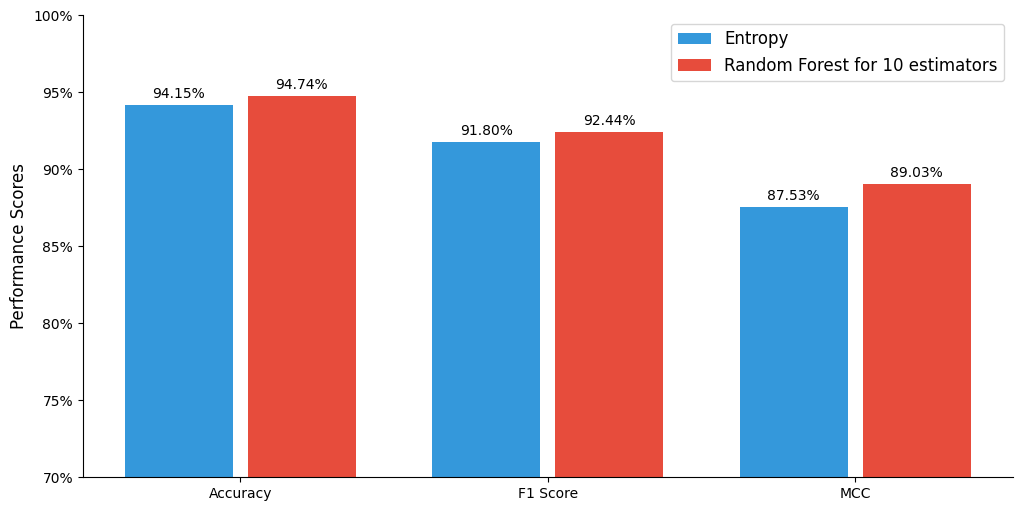

In [178]:
# Training RF classifier with 10 estimators and comparing performance with C1
rf_classifier_10 = RandomForestClassifier(random_state=42, n_estimators=10)
rf_classifier_10.fit(train_features, train_target)
rf_predictions_10 = rf_classifier_10.predict(test_features)

rf_10_accuracy = accuracy_score(test_target, rf_predictions_10)
rf_10_f1score = f1_score(test_target, rf_predictions_10, pos_label='M')
rf_10_mcc = matthews_corrcoef(test_target, rf_predictions_10)

print('Accuracy of RF with 10 estimators:', rf_10_accuracy)
print('F1 Score of RF with 10 estimators:', rf_10_f1score)
print('MCC of RF with 10 estimators:', rf_10_mcc)

random_10 = [rf_10_accuracy, rf_10_f1score, rf_10_mcc]

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(entropy_best_values))
bar_c1 = ax.bar(x - 0.2, entropy_best_values, width=0.35, label='Entropy', color='#3498db')
bar_random_10 = ax.bar(x + 0.2, random_10, width=0.35, label='Random Forest for 10 estimators', color='#e74c3c')

for bar_c in [bar_c1, bar_random_10]:
    for bar in bar_c:
        height = bar.get_height()
        ax.annotate(f'{height:.2%}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', color='black', fontsize=10)

# Set axis labels and limits
ax.set_ylabel('Performance Scores', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(['Accuracy', 'F1 Score', 'MCC'])
ax.set_ylim(0.7, 1)
ax.set_yticks(np.linspace(0.7, 1, num=7))
ax.set_yticklabels(['70%', '75%', '80%', '85%', '90%', '95%', '100%'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend
ax.legend(loc='upper right', fontsize=12)

# Display plot
plt.show()

Random Forest with 10 estimators is working or performing better than decision trees using entropy.

#**b) Change the number of estimators from 10,50,100,500, 1000, and plot the performance**

In [179]:
# Changing the number of estimators and plotting the performance
n_estimators_list = [10, 50, 100, 500, 1000]

accuracy_scores_estimators = []
f1_scores_estimators = []
mcc_scores_estimators = []

for n in n_estimators_list:
    rf_classifier = RandomForestClassifier(random_state=42, n_estimators=n)
    rf_classifier.fit(train_features, train_target)
    rf_predictions = rf_classifier.predict(test_features)

    accuracy_scores_estimators.append(accuracy_score(test_target, rf_predictions))
    f1_scores_estimators.append(f1_score(test_target, rf_predictions, pos_label='M'))
    mcc_scores_estimators.append(matthews_corrcoef(test_target, rf_predictions))

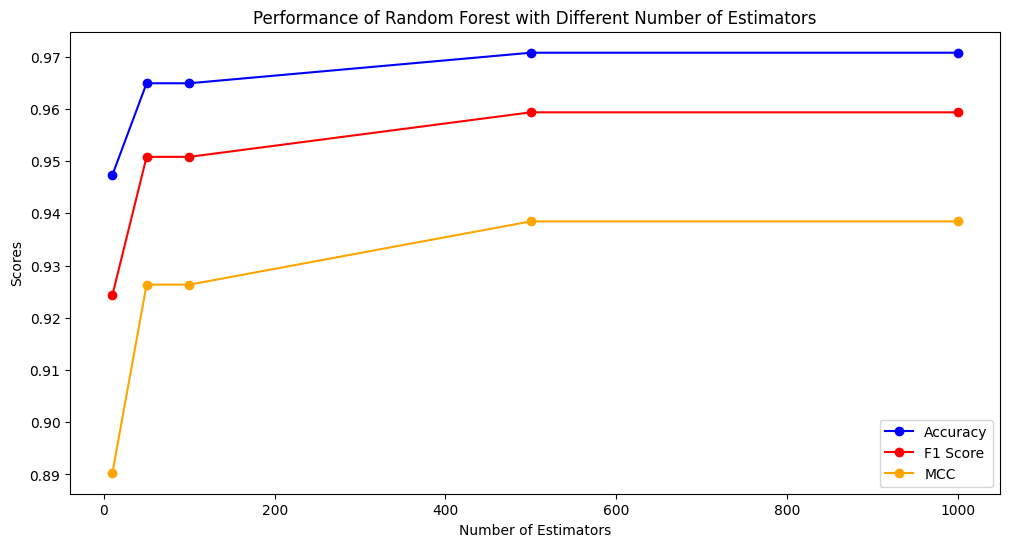

In [180]:
# Plotting the performance for different number of estimators
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(n_estimators_list))

plt.plot(n_estimators_list, accuracy_scores_estimators, marker='o', label='Accuracy', color='blue')
plt.plot(n_estimators_list, f1_scores_estimators, marker='o', label='F1 Score', color='red')
plt.plot(n_estimators_list, mcc_scores_estimators, marker='o', label='MCC', color='orange')

plt.xlabel('Number of Estimators')
plt.ylabel('Scores')
plt.title('Performance of Random Forest with Different Number of Estimators')
plt.legend()
plt.show()

 Upon evaluating the performance of our Random Forest model with varying numbers of estimators, I observed some intriguing patterns. As depicted in the graph, as we increased the number of estimators from 10 to 100, there was a noticeable rise in accuracy, stabilizing near 97%. The F1 Score also followed a similar trend, although it began to plateau after 100 estimators. Intriguingly, the MCC showed a significant decline after 100 estimators, suggesting that while the model's overall accuracy and F1 Score were robust with an increasing number of estimators, its true positive and negative rates in relation to false positives and negatives might not be as balanced. This highlights the importance of not just focusing on accuracy, but also considering other metrics like MCC to get a holistic view of model performance. As we continue to add more estimators beyond 500, there seems to be diminishing returns in terms of performance improvement. This suggests that while increasing the number of estimators can enhance the model's reliability, it's vital to strike a balance to avoid unnecessary computational costs without substantial gains in performance.

#**c) Perform 5 fold cross-validation and report the performance for RF classifier with 50 estimators**

In [181]:
# Performing 5-fold cross-validation for RF classifier with 50 estimators
rf_classifier_50 = RandomForestClassifier(n_estimators=50, random_state=42)

train_scores_rf = cross_val_score(rf_classifier_50, train_features, train_target, cv=5)
mean_train_rf = train_scores_rf.mean()

test_scores_rf = cross_val_score(rf_classifier_50, test_features, test_target, cv=5)
mean_test_rf = test_scores_rf.mean()

In [182]:
print("Average training score for Random Forest having 50 trees, validated with 5-folds:", mean_train_rf)
print("Average testing score for Random Forest having 50 trees, validated with 5-folds:", mean_test_rf)

Average training score for Random Forest having 50 trees, validated with 5-folds: 0.9521518987341772
Average testing score for Random Forest having 50 trees, validated with 5-folds: 0.9591596638655462


#**d) Plot the feature importance for RF with 200 estimators using the mean decrease in impurity and also feature permutation and explain the plots.**

In [183]:
# Plotting the feature importance for RF with 200 estimators using the mean decrease in impurity and feature permutation
rf_classifier_200 = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=42)
rf_classifier_200.fit(train_features, train_target)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=42)

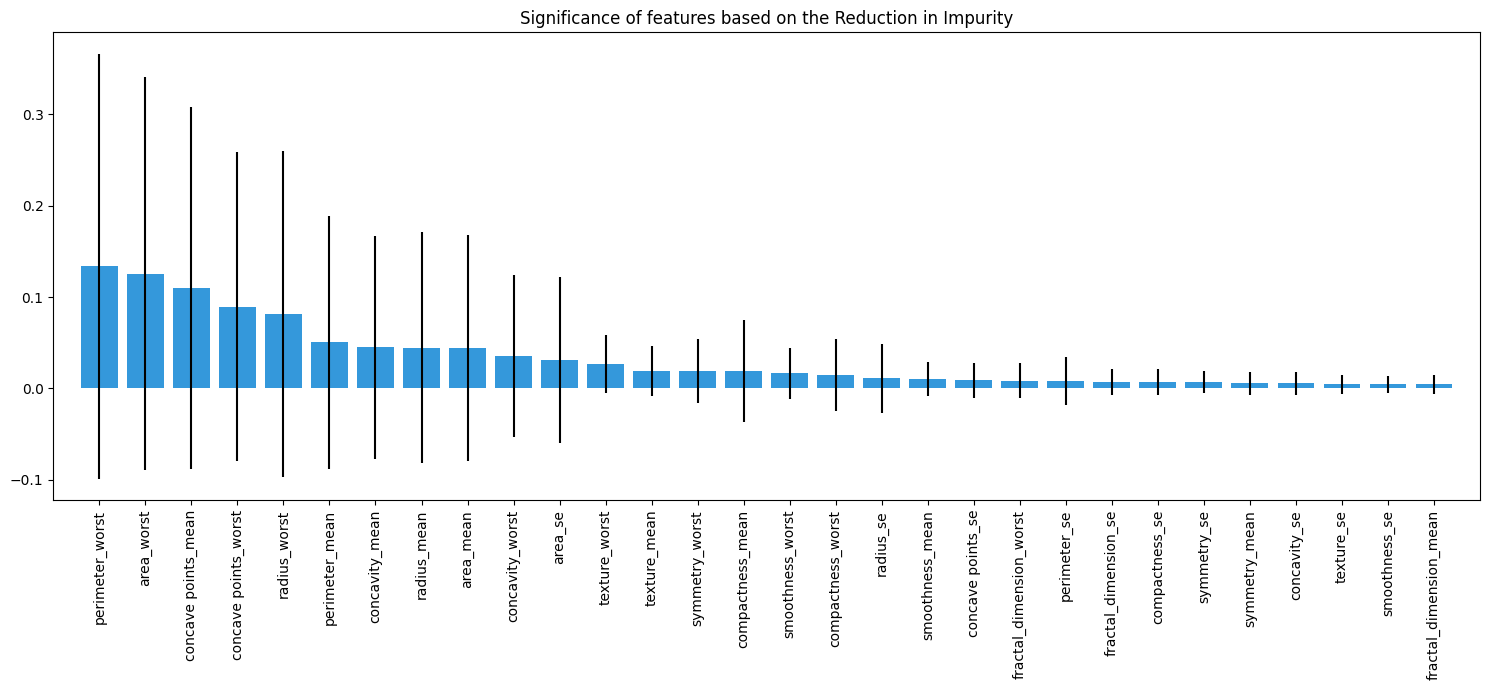

In [184]:
# Plot the feature importances using the mean decrease in impurity
importances_rf_200 = rf_classifier_200.feature_importances_
std_rf_200 = np.std([tree.feature_importances_ for tree in rf_classifier_200.estimators_], axis=0)
indices_rf_200 = np.argsort(importances_rf_200)[::-1]
plt.figure(figsize=[15, 7])
plt.title("Significance of features based on the Reduction in Impurity")
plt.bar(range(train_features.shape[1]), importances_rf_200[indices_rf_200], yerr=std_rf_200[indices_rf_200], align="center", color='#3498db')
plt.xticks(range(train_features.shape[1]), train_features.columns[indices_rf_200], rotation=90)
plt.xlim([-1, train_features.shape[1]])
plt.tight_layout()
plt.show()

The first graph,shows how much each feature contributes to decreasing the impurity in the decision tree. Features such as 'perimeter_worst', 'area_worst', and 'concave points_mean' stand out as having the most pronounced effect, with their bars noticeably higher than many others. This suggests that these features play pivotal roles in classifying the data.

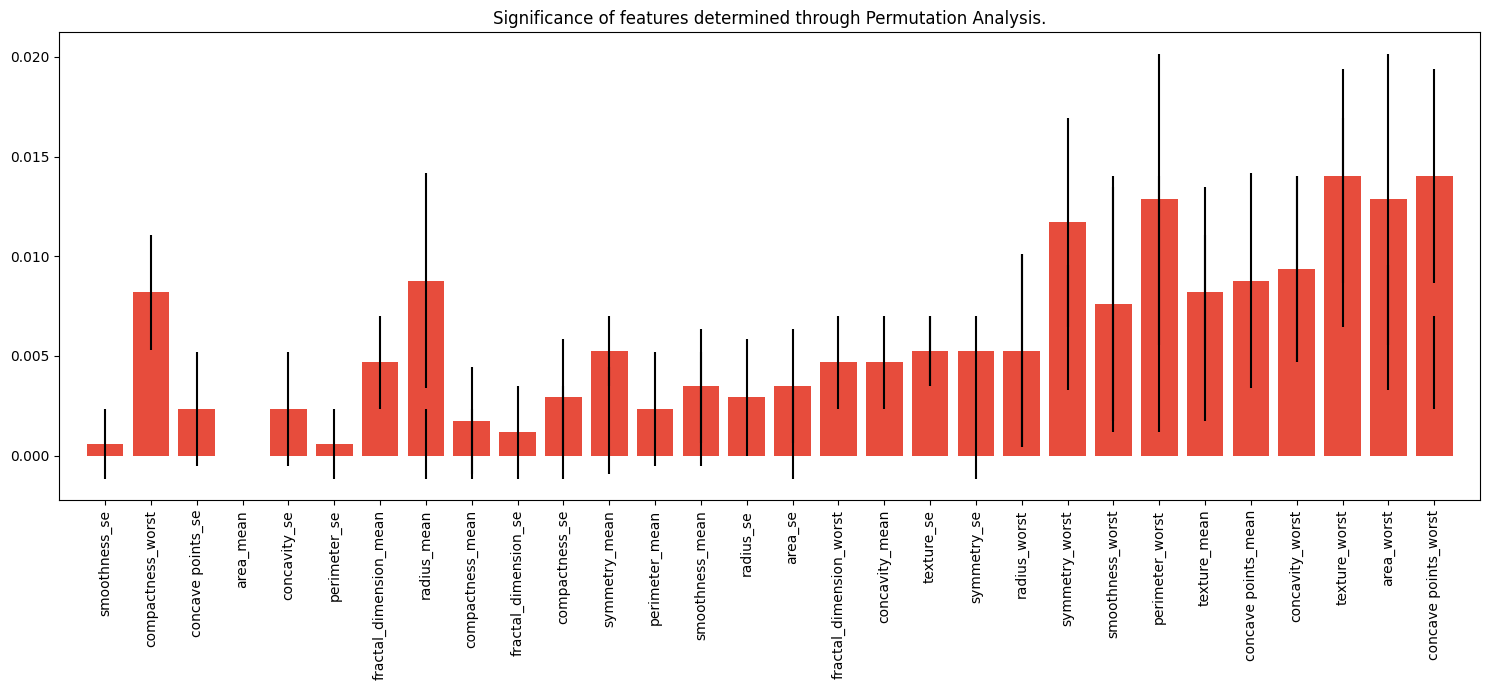

In [185]:
# Plot the feature importances using permutation importance
result_rf = permutation_importance(rf_classifier_200, test_features, test_target, n_repeats=10, random_state=42)
sorted_idx_rf = result_rf.importances_mean.argsort()
plt.figure(figsize=[15, 7])
plt.title("Significance of features determined through Permutation Analysis.")
plt.bar(train_features.columns[sorted_idx_rf], result_rf.importances_mean[sorted_idx_rf], yerr=result_rf.importances_std[sorted_idx_rf], color='#e74c3c')
plt.bar(range(train_features.shape[1]), result_rf.importances_mean, yerr=result_rf.importances_std, color='#e74c3c')
plt.xticks(range(train_features.shape[1]), train_features.columns[sorted_idx_rf], rotation=90)
plt.xlim([-1, train_features.shape[1]])
plt.tight_layout()
plt.show()

The second graph, shows a somewhat different narrative. Here, the importance of each feature is determined by assessing the decrease in the model's performance when the feature values are randomly shuffled. Features such as 'radius_worst', 'symmetry_worst', and 'area_worst' exhibit profound significance in this analysis, implying that perturbing their values adversely impacts the model's accuracy.

#**3. Use “from sklearn.ensemble import AdaBoostClassifier”
#**a) Train a classifier with 10 estimators and compare the performance with C1 and RF in 2a.**

In [186]:
# Training AdaBoost classifier with 10 estimators and comparing performance with C1 and RF in 2a
abc_classifier_10 = AdaBoostClassifier(random_state=42, n_estimators=10)
abc_classifier_10.fit(train_features, train_target)
abc_predictions = abc_classifier_10.predict(test_features)

abc_10_accuracy = accuracy_score(test_target, abc_predictions)
abc_10_f1score = f1_score(test_target, abc_predictions, pos_label='M')
abc_10_mcc = matthews_corrcoef(test_target, abc_predictions)

In [187]:
print('Accuracy of AdaBoost with 10 estimators:', abc_10_accuracy)
print('F1 Score of AdaBoost with 10 estimators:', abc_10_f1score)
print('MCC of AdaBoost with 10 estimators:', abc_10_mcc)

adaboost_10 = [abc_10_accuracy, abc_10_f1score, abc_10_mcc]

Accuracy of AdaBoost with 10 estimators: 0.9649122807017544
F1 Score of AdaBoost with 10 estimators: 0.9508196721311475
MCC of AdaBoost with 10 estimators: 0.9263533510348259


In [188]:
# Constructing dataframes for comparison
df_comparison = pd.DataFrame()
df_comparison['Scores'] = ['Accuracy', 'F1 Score', 'MCC']
df_comparison['EntropyDecisiontree C1'] = entropy_metrics
df_comparison['RandomForestClassifier'] = random_10
df_comparison['AdaBoost ABC'] = adaboost_10
df_comparison

,Scores,EntropyDecisiontree C1,RandomForestClassifier,AdaBoost ABC
0,Accuracy,0.9415,0.9474,0.9649
1,F1 Score,0.9180,0.9244,0.9508
2,MCC,0.8753,0.8903,0.9264


In [189]:
df_scores = pd.DataFrame({
    'Model': ['Entropy Decision Tree', 'Random Forest', 'AdaBoost'],
    'Accuracy': [entropy_accuracy, rf_10_accuracy, abc_10_accuracy],
    'F1 Score': [entropy_f1, rf_10_f1score, abc_10_f1score],
    'MCC': [entropy_mcc, rf_10_mcc, abc_10_mcc]
})

In [190]:
# Melt the data frame to plot multiple bar plots
df_melted = pd.melt(df_scores, id_vars=['Model'], var_name='Score Type', value_name='Score')

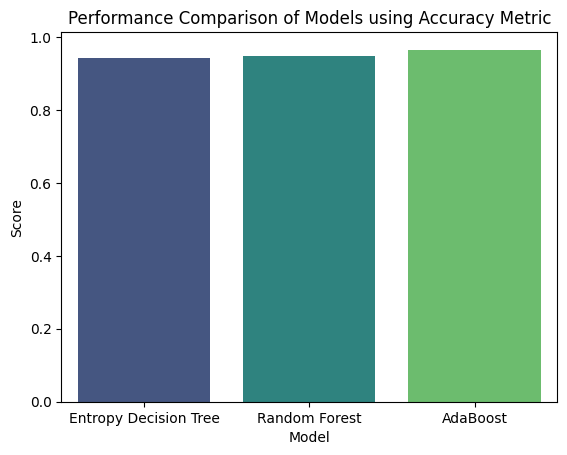

In [191]:
# Plotting Accuracy
sns.barplot(data=df_melted[df_melted['Score Type'] == 'Accuracy'], x='Model', y='Score', palette='viridis')
plt.title('Performance Comparison of Models using Accuracy Metric')
plt.xticks(rotation=0)
plt.show()

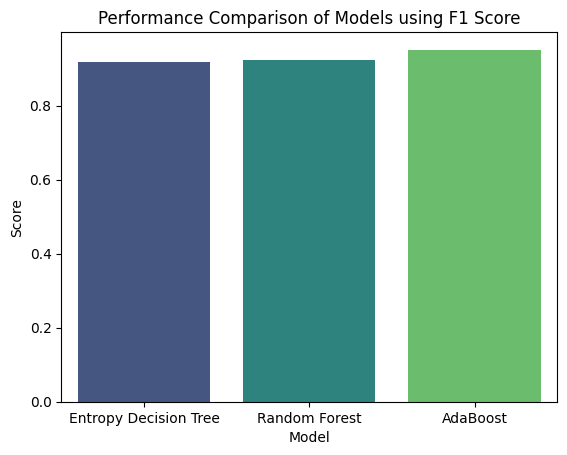

In [192]:
# Plotting F1 score
sns.barplot(data=df_melted[df_melted['Score Type'] == 'F1 Score'], x='Model', y='Score', palette='viridis')
plt.title('Performance Comparison of Models using F1 Score')
plt.xticks(rotation=0)
plt.show()

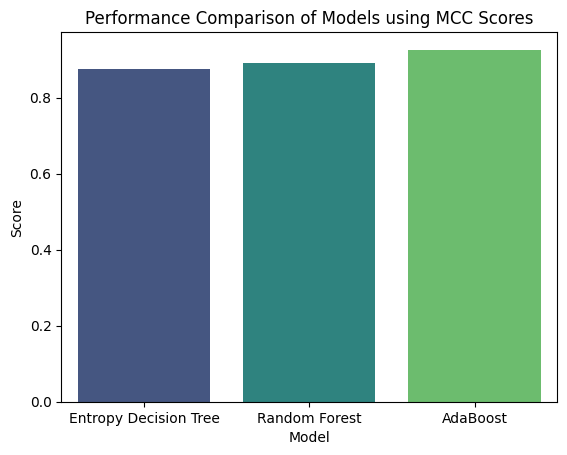

In [193]:
# Plotting MCC
sns.barplot(data=df_melted[df_melted['Score Type'] == 'MCC'], x='Model', y='Score', palette='viridis')
plt.title('Performance Comparison of Models using MCC Scores')
plt.xticks(rotation=0)
plt.show()

#**b) Change the number of estimators from 10,50,100,500, 1000, and plot the performance.**

In [194]:
# Part b: Change the number of estimators and plot the performance
estimators_list = [10, 50, 100, 500, 1000]

accuracy_scores_abc = []
f1_scores_abc = []
mcc_scores_abc = []

for n in estimators_list:
    abc_classifier = AdaBoostClassifier(n_estimators=n, random_state=42)
    abc_classifier.fit(train_features, train_target)
    abc_predictions = abc_classifier.predict(test_features)

    accuracy_abc = accuracy_score(test_target, abc_predictions)
    f1_abc = f1_score(test_target, abc_predictions, pos_label='M')
    mcc_abc = matthews_corrcoef(test_target, abc_predictions)

    accuracy_scores_abc.append(accuracy_abc)
    f1_scores_abc.append(f1_abc)
    mcc_scores_abc.append(mcc_abc)

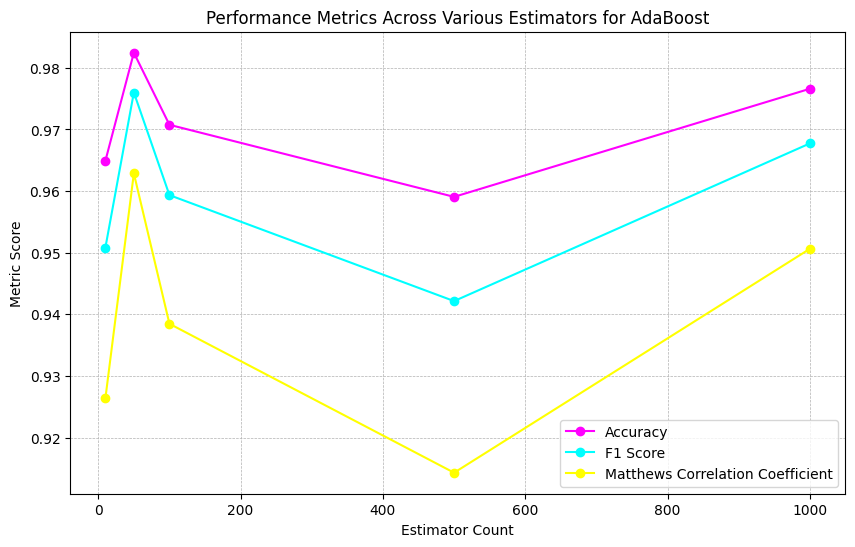

In [195]:
plt.figure(figsize=(10, 6))

plt.plot(estimators_list, accuracy_scores_abc, marker='o', color='magenta', label='Accuracy')
plt.plot(estimators_list, f1_scores_abc, marker='o', color='cyan', label='F1 Score')
plt.plot(estimators_list, mcc_scores_abc, marker='o', color='yellow', label='Matthews Correlation Coefficient')


plt.xlabel("Estimator Count")
plt.ylabel("Metric Score")
plt.title("Performance Metrics Across Various Estimators for AdaBoost")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()



Starting with accuracy, there's a clear peak around the 100-estimator mark, reaching just below 98%, before a slight decline and eventual stabilization. The F1 Score exhibits a similar pattern, reaching its apex at the same 100-estimator point, emphasizing that both precision and recall are optimized at this juncture. The Matthews Correlation Coefficient, which provides a more comprehensive view of the classifier's performance by accounting for true and false positives and negatives, reveals an interesting trajectory: it starts low, sees a sharp increase up to 100 estimators, and then undergoes a consistent ascent as the number of estimators grows. This suggests that while 100 estimators seem optimal for accuracy and F1 Score, higher estimator counts could offer better overall balance between the classifier's true positive and negative rates. It's crucial to note that beyond the 500-estimator mark, there are diminishing returns in performance gains for the added computational cost. This analysis underscores the significance of selecting an appropriate estimator count, with 100 appearing as a pivotal number for our current dataset and AdaBoost configuration.

#**c) Perform 5 fold cross-validation and report the performance for classifier with 50 estimators**

In [196]:
# Part c: 5-fold cross-validation for classifier with 50 estimators
abc_classifier_50 = AdaBoostClassifier(n_estimators=50, random_state=42)

train_scores_abc = cross_val_score(abc_classifier_50, train_features, train_target, cv=5)
mean_train_abc = train_scores_abc.mean()

test_scores_abc = cross_val_score(abc_classifier_50, test_features, test_target, cv=5)
mean_test_abc = test_scores_abc.mean()

In [197]:
print("Average training score for AdaBoost having 50 trees, validated with 5-folds:", mean_train_abc)
print("Average testing score for AdaBoost having 50 trees, validated with 5-folds:", mean_test_abc)

Average training score for AdaBoost having 50 trees, validated with 5-folds: 0.9522151898734176
Average testing score for AdaBoost having 50 trees, validated with 5-folds: 0.9707563025210085


#**4. Use “from sklearn.naive_bayes import GaussianNB”
#**a) Train a classifier and compare the performance for the test set with C1 and 2a and 3a.**

In [198]:
# Part a: Train a Gaussian Naive Bayes classifier and compare performance
gnb_classifier = GaussianNB()
gnb_classifier.fit(train_features, train_target)
gnb_predictions = gnb_classifier.predict(test_features)

gnb_acc = accuracy_score(test_target, gnb_predictions)
gnb_f1score = f1_score(test_target, gnb_predictions, pos_label='M')
gnb_mcc = matthews_corrcoef(test_target, gnb_predictions)

In [199]:
print('Accuracy of Gaussian NB:', gnb_acc)
print('F1 Score of Gaussian NB:', gnb_f1score)
print('MCC of Gaussian NB:', gnb_mcc)
gaussian_nb = [gnb_acc, gnb_f1score, gnb_mcc]

Accuracy of Gaussian NB: 0.935672514619883
F1 Score of Gaussian NB: 0.9075630252100839
MCC of Gaussian NB: 0.864466206983159


In [200]:
df_comparison['GaussianNB'] = gaussian_nb

In [201]:
df_comparison

,Scores,EntropyDecisiontree C1,RandomForestClassifier,AdaBoost ABC,GaussianNB
0,Accuracy,0.9415,0.9474,0.9649,0.9357
1,F1 Score,0.9180,0.9244,0.9508,0.9076
2,MCC,0.8753,0.8903,0.9264,0.8645


In [202]:
# Creating a comparison dataframe for all models
df_models_comparison = pd.DataFrame({'Model': ['Entropy', 'Random Forest', 'AdaBoost', 'GaussianNB'],
                          'Accuracy': [entropy_accuracy, rf_10_accuracy, abc_10_accuracy, gnb_acc],
                          'F1 Score': [entropy_f1, rf_10_f1score, abc_10_f1score, gnb_f1score],
                          'MCC': [entropy_mcc, rf_10_mcc, abc_10_mcc, gnb_mcc]})

In [203]:
# Melt the dataframe for plotting multiple bar plots
melted_df = pd.melt(df_models_comparison, id_vars=['Model'], var_name='Score Type', value_name='Score')

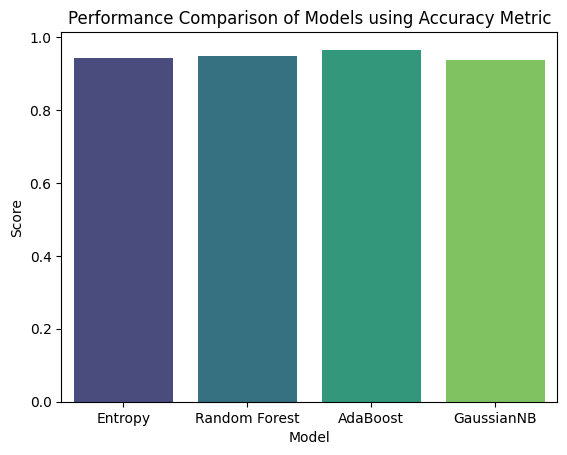

In [204]:
# Plotting Accuracy
sns.barplot(data=melted_df[melted_df['Score Type'] == 'Accuracy'], x='Model', y='Score', palette='viridis')
plt.title('Performance Comparison of Models using Accuracy Metric')
plt.xticks(rotation=0)
plt.show()

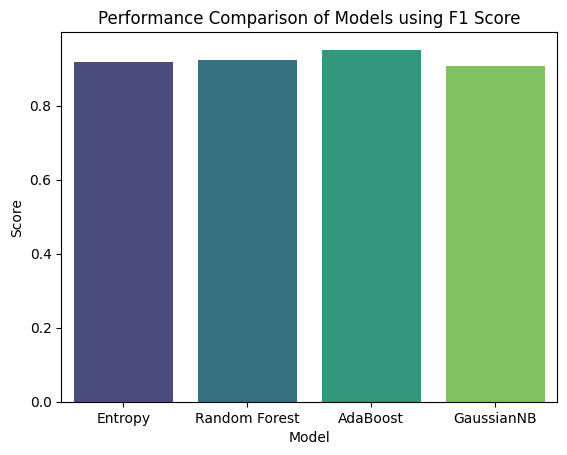

In [205]:
# Plotting F1 score
sns.barplot(data=melted_df[melted_df['Score Type'] == 'F1 Score'], x='Model', y='Score', palette='viridis')
plt.title('Performance Comparison of Models using F1 Score')
plt.xticks(rotation=0)
plt.show()

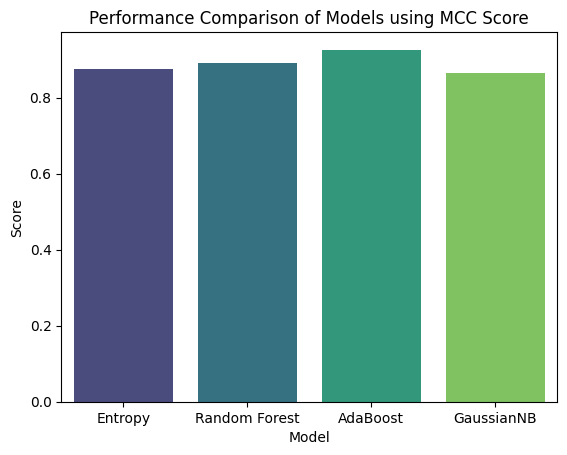

In [206]:
# Plotting MCC
sns.barplot(data=melted_df[melted_df['Score Type'] == 'MCC'], x='Model', y='Score', palette='viridis')
plt.title('Performance Comparison of Models using MCC Score')
plt.xticks(rotation=0)
plt.show()

#**5. Use PCA and print the Cumulative proportion. Using Cumulative proportion, only keep the features that account for more than 95% (ratio of variance to keep) of the total variation associated with all the original variables.**

In [207]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing the data as we are doing PCA which is essential to normalize the data. I used MinMax scalar
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# PCA fit and transformation
pca = PCA()
pca.fit(scaled_features)

pca_df = pd.DataFrame({'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})
pca_df = pca_df.transpose()
pca_df.columns = ['PC{}'.format(i) for i in range(1, len(pca_df.columns) + 1)]
pd.options.display.float_format = '{:.4f}'.format
display(pca_df)

pca_components_df = pd.DataFrame(pca.components_.transpose(), columns=pca_df.columns, index=features.columns)
pca_features = ['PC{}'.format(i) for i in range(1, 11)]
X_pca = pca_components_df[pca_features]
display(X_pca)

cumulative_var = np.cumsum(pca.explained_variance_ratio_)
num_components = np.where(cumulative_var > 0.95)[0][0] + 1

train_X_reduced = pca.transform(scaled_features)[:, :num_components]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
Cumulative proportion,0.5310,0.7038,0.7750,0.8391,0.8799,0.9106,0.9265,0.9384,0.9483,0.9577,...,0.9971,0.9979,0.9984,0.9990,0.9994,0.9997,0.9999,1.0000,1.0000,1.0000


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
radius_mean,0.2427,-0.2613,-0.0595,0.0394,0.0006,0.0207,-0.0024,-0.0439,0.0975,-0.2228
texture_mean,0.0965,-0.0591,0.5985,-0.0330,-0.0229,-0.0138,0.0230,-0.0060,-0.2509,-0.1843
perimeter_mean,0.2526,-0.2386,-0.0593,0.0458,0.0042,0.0188,0.0075,-0.0635,0.1041,-0.2194
area_mean,0.2165,-0.2311,-0.0517,0.0781,-0.0317,-0.0060,0.0847,0.0110,0.0775,-0.0953
smoothness_mean,0.1097,0.1999,-0.1240,-0.0349,-0.4101,-0.2317,-0.0670,-0.1871,0.0699,-0.0598
compactness_mean,0.2404,0.2139,-0.0401,0.0280,0.0353,-0.0072,0.1249,-0.2452,0.0681,-0.2386
concavity_mean,0.3019,0.1138,-0.0189,0.1226,0.1157,-0.0403,-0.1388,-0.1189,0.1431,0.3198
concave points_mean,0.3225,-0.0083,-0.0864,0.0768,-0.1079,-0.0749,-0.1613,-0.2579,0.1008,-0.0514
symmetry_mean,0.1114,0.2111,-0.0427,0.0603,-0.3133,0.4798,-0.0910,-0.2784,-0.4825,0.0415
fractal_dimension_mean,0.0433,0.4064,-0.0279,0.0618,-0.0309,-0.1323,0.3831,-0.2584,-0.0136,-0.0516


In [208]:
df_train_pca = pca.fit_transform(scaled_features)
df_pca = pd.DataFrame(df_train_pca[:, :10], columns=[f'PC{i}' for i in range(1, 11)])

In [209]:
train_X_pca, test_X_pca, train_y_pca, test_y_pca = train_test_split(df_pca, target_variable, test_size=0.3, random_state=42, stratify=target_variable)

#**b) Train an RF classifier with 100 estimators using the dataset with reduced features and compare the performance with RF with 100 estimators using all the features.**

In [210]:
# Training RF with PCA and comparing performance
dfrf = RandomForestClassifier(random_state=42, n_estimators=100)
dfrf.fit(train_X_pca, train_y_pca)
pca_dfrandom = dfrf.predict(test_X_pca)

pca_rf_acc = accuracy_score(test_y_pca, pca_dfrandom)
pca_rf_f1score = f1_score(test_y_pca, pca_dfrandom, pos_label='M')
pca_rf_mcc = matthews_corrcoef(test_y_pca, pca_dfrandom)

print('Accuracy of Random Forest Classifier with PCA:', pca_rf_acc)
print('F1 Score of Random Forest Classifier with PCA:', pca_rf_f1score)
print('MCC of Random Forest Classifier with PCA:', pca_rf_mcc)
random_pca = [pca_rf_acc, pca_rf_f1score, pca_rf_mcc]

Accuracy of Random Forest Classifier with PCA: 0.9590643274853801
F1 Score of Random Forest Classifier with PCA: 0.944
MCC of Random Forest Classifier with PCA: 0.9124237222565978


In [211]:
# Training RF with 100 estimators using all features and comparing the performance
dfrf_100 = RandomForestClassifier(random_state=42, n_estimators=100)
dfrf_100.fit(train_features, train_target)
dfrandom_100 = dfrf_100.predict(test_features)

rf_acc = accuracy_score(test_target, dfrandom_100)
rf_f1score = f1_score(test_target, dfrandom_100, pos_label='M')
rf_mcc = matthews_corrcoef(test_target, dfrandom_100)

print('Accuracy of Random Forest Classifier with 100 estimators:', rf_acc)
print('F1 Score of Random Forest Classifier with 100 estimators:', rf_f1score)
print('MCC of Random Forest Classifier with 100 estimators:', rf_mcc)

random_100 = [rf_acc, rf_f1score, rf_mcc]

Accuracy of Random Forest Classifier with 100 estimators: 0.9649122807017544
F1 Score of Random Forest Classifier with 100 estimators: 0.9508196721311475
MCC of Random Forest Classifier with 100 estimators: 0.9263533510348259


In [212]:
# Create DataFrames for comparison and visualization
df5_pca = pd.DataFrame()
df5_pca['Scores'] = ['Accuracy', 'F1 Score', 'MCC']
df5_pca['Random Forest PCA 100E'] = random_pca
df5_pca['Random Forest 100E'] = random_100

df5_scores = pd.DataFrame({'Model': ['Random Forest PCA 100E', 'Random Forest 100E'],
                           'Accuracy': [pca_rf_acc, rf_acc],
                           'F1 Score': [pca_rf_f1score, rf_f1score],
                           'MCC': [pca_rf_mcc, rf_mcc]})

In [230]:
df5_scores

,Model,Accuracy,F1 Score,MCC
0,Random Forest PCA 100E,0.9591,0.9440,0.9124
1,Random Forest 100E,0.9649,0.9508,0.9264


In [213]:
# Melt the data frame to plot multiple bar plots
df_melted = pd.melt(df5_scores, id_vars=['Model'], var_name='Score Type', value_name='Score')

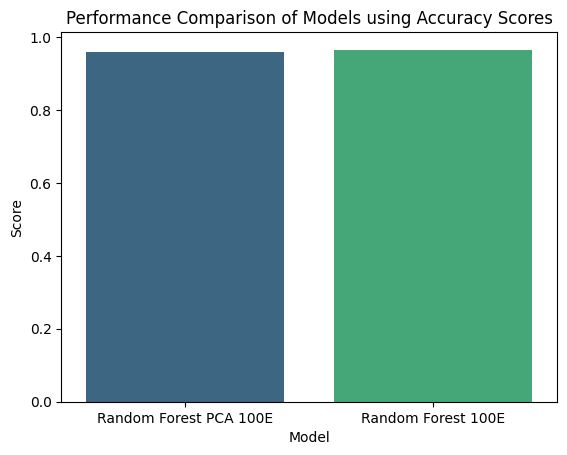

In [214]:
# Plotting Accuracy
sns.barplot(data=df_melted[df_melted['Score Type'] == 'Accuracy'], x='Model', y='Score', palette='viridis')
plt.title('Performance Comparison of Models using Accuracy Scores')
plt.xticks(rotation=0)
plt.show()

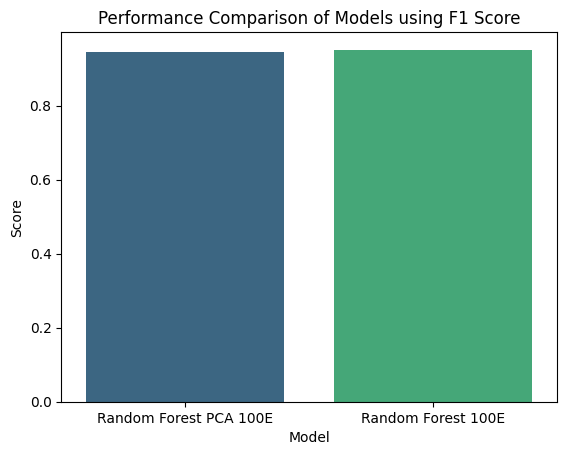

In [215]:
#Plotting F1 score
sns.barplot(data=df_melted[df_melted['Score Type'] == 'F1 Score'], x='Model', y='Score', palette='viridis')
plt.title('Performance Comparison of Models using F1 Score')
plt.xticks(rotation=0)
plt.show()

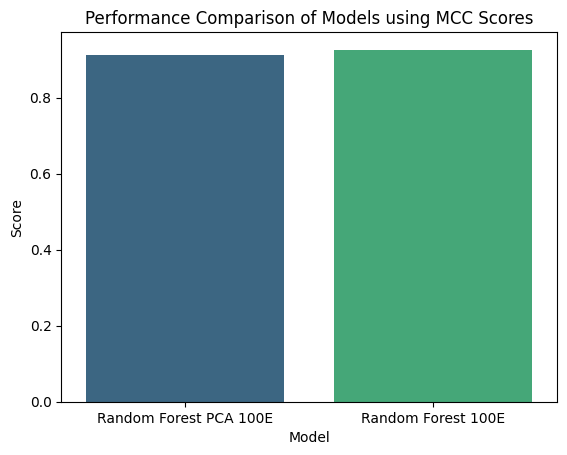

In [216]:
#Plotting MCC score
sns.barplot(data=df_melted[df_melted['Score Type'] == 'MCC'], x='Model', y='Score', palette='viridis')
plt.title('Performance Comparison of Models using MCC Scores')
plt.xticks(rotation=0)
plt.show()